In [122]:
from utils import *

In [123]:
event_0to999 = importpdrange(0, 999)
event_0 = importpbdatapandas(0)

importing event  1
importing event  2
importing event  3
importing event  4
importing event  5
importing event  6
importing event  7
importing event  8
importing event  9
importing event  10
importing event  11
importing event  12
importing event  13
importing event  14
importing event  15
importing event  16
importing event  17
importing event  18
importing event  19
importing event  20
importing event  21
importing event  22
importing event  23
importing event  24
importing event  25
importing event  26
importing event  27
importing event  28
importing event  29
importing event  30
importing event  31
importing event  32
importing event  33
importing event  34
importing event  35
importing event  36
importing event  37
importing event  38
importing event  39
importing event  40
importing event  41
importing event  42
importing event  43
importing event  44
importing event  45
importing event  46
importing event  47
importing event  48
importing event  49
importing event  50
importing

In [124]:
# # 3d surface plot the data
# from mpl_toolkits import mplot3d

# phi = event_0to999['phi']
# eta = event_0to999['eta']

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_surface(phi, eta, s)
# plt.show()

In [125]:
# import matplotlib.pyplot as plt
# from matplotlib import cm
# from matplotlib.ticker import LinearLocator
# import numpy as np

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# # Make data.
# X = event_20['phi']
# Y = event_20['eta']
# X, Y = np.meshgrid(X, Y)
# Z = np.sqrt(X**2+Y**2)

# # Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=False)

# # Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')
# ax.set_xlabel('phi')
# ax.set_ylabel('eta')
# ax.set_zlabel('S')

# # Add a color bar which maps values to colors.

# plt.show()

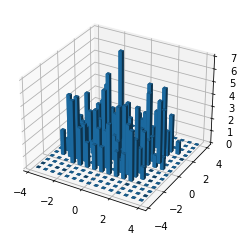

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
x = event_0['phi']
y = event_0['eta']

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=15, range=[[-4, 4], [-4, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.25 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [198]:
def surfacedata(dfdata, dx = 0.5, dy = 0.5, rangex=4, rangey=4):
    phi_c = math.ceil(rangex*2/dx)
    eta_c = math.ceil(rangey*2/dy)
    phi_data = np.arange(-rangex, rangex, dx)+dx/2
    eta_data = np.arange(-rangey, rangey, dy)+dy/2
    z_data = np.zeros([phi_c, eta_c], dtype=int)
    for index,instance in dfdata.iterrows():
        if instance['phi'] > rangex or instance['phi'] < -rangex or instance['eta'] > rangey or instance['eta'] < -rangey:
            continue
        phi_index = math.floor((instance['phi']+rangex)/dx)
        eta_index = math.floor((instance['eta']+rangey)/dy)
        z_data[phi_index][eta_index] += 1
    return phi_data, eta_data, z_data.T


# ax.set_xlabel('phi')
# ax.set_ylabel('eta')

In [148]:
event_a_x, event_a_y, event_a_z = surfacedata(event_0to999, dx=0.1, dy=0.1, rangex=3.5, rangey=3.5)
print(event_a_x.shape, event_a_y.shape, event_a_z.shape)

(70,) (70,) (70, 70)


In [156]:
event_0_x, event_0_y, event_0_z = surfacedata(event_0, dx=0.5, dy=0.5, rangex=4, rangey=4)

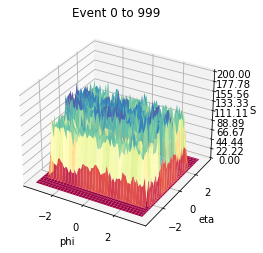

In [157]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_a_x
Y = event_a_y
X, Y = np.meshgrid(X, Y)
Z = event_a_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 200)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('phi')
ax.set_ylabel('eta')
ax.set_zlabel('S')
plt.title('Event 0 to 999')
# Add a color bar which maps values to colors.

plt.show()

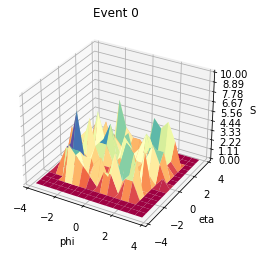

In [158]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = event_0_x
Y = event_0_y
X, Y = np.meshgrid(X, Y)
Z = event_0_z

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('phi')
ax.set_ylabel('eta')
ax.set_zlabel('S')
plt.title('Event 0')

# Add a color bar which maps values to colors.

plt.show()

In [194]:
def d_data(event):

    deta=np.array([])
    dphi=np.array([])
    for i in range(len(event)-1):
        for j in range(i+1,len(event)-1):
            deta=np.append(deta,(event['eta'][i]-event['eta'][j]))
            dphi=np.append(dphi,(event['phi'][i]-event['phi'][j]))
    
    df = pd.DataFrame(np.vstack([dphi,deta]).T,columns=['phi','eta'])
    return df

In [195]:
event_0_ddata = d_data(event_0)
# to pandas with 'phi' and 'eta' as index


In [196]:
df = pd.DataFrame(columns=['Numbers'])
print(df)

Empty DataFrame
Columns: [Numbers]
Index: []


In [199]:
event_0_dx, event_0_dy, event_0_dz = surfacedata(event_0_ddata, dx=0.5, dy=0.5, rangex=4, rangey=4)

IndexError: index 16 is out of bounds for axis 0 with size 16